# Paper data and figures

## Documentation and Imports


Created on 03-08-2022

Author: Valentin Laplaud


In [1]:
## Clean up before script start 

for element in dir():

    if element[0:1] != "_":

        del globals()[element]

import gc
gc.collect()


print('\033[1m' + '\033[4m' + '\nRunning :  ''PaperDataAndFigs''\n' + '\033[0m')

import datetime

# plotting stuff
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.use('tkagg')
%matplotlib inline

COLOR = 'black'
COLOR2 = 'white'

mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR
mpl.rcParams['axes.labelsize'] =  'large'

mpl.rcParams["figure.facecolor"] = COLOR2
mpl.rcParams["axes.facecolor"] = COLOR2
mpl.rcParams["savefig.facecolor"] = COLOR2
mpl.rcParams['axes.facecolor'] = COLOR2

# numbers handling
import numpy as np
# import numpy.matlib as mtl
import pandas as pd

# to hide known warnings
import warnings
warnings.filterwarnings("ignore")

# General system functions
import os
import shutil
import sys

import time

# my functions
sys.path.append(r'd:\Users\laplaud\Desktop\PostDoc\Code\PythonFunctions\\')
import VallapFunc as vf
from StatsFunctions import plotSig, Corr
from Main import compareGrowth, compareHydroMech, GOC_Comp, plotGRratio



Running :  PaperDataAndFigs



## Data loading and color definition

In [2]:
%run d:\Users\laplaud\Desktop\PostDoc\Code\PythonFunctions\ExperimentList.py

Data choice made.


### Loading

In [3]:
####################################### Growth #########################################################################################

## Expe 220214 Ctrl growth
GD220214_Ct1 = pd.read_csv(P220214_Ct1 + '\\GlobalData220214_Ct1_AreaFit.csv', index_col = 'Ind') 
GD220214_Ct2 = pd.read_csv(P220214_Ct2 + '\\GlobalData220214_Ct2_AreaFit.csv', index_col = 'Ind')      

# Expe 220531 Ctrl growth
GD220531_Ct1 = pd.read_csv(P220531_Ct1 + '\\GlobalData220531_Ct1_AreaFit.csv', index_col = 'Ind') 
GD220531_Ct2 = pd.read_csv(P220531_Ct2 + '\\GlobalData220531_Ct2_AreaFit.csv', index_col = 'Ind')      

## Expe 220727 Ctrl growth
GD220727_Hyper = pd.read_csv(P220727_Hyper + '\\GlobalData220727_Hyper_AreaFit.csv', index_col = 'Ind') 
GD220727_Hypo = pd.read_csv(P220727_Hypo + '\\GlobalData220727_Hypo_AreaFit.csv', index_col = 'Ind')  

# Expe 220801 Ctrl growth
GD220801_Ct1 = pd.read_csv(P220801_Ct1 + '\\GlobalData220801_Ct1_AreaFit.csv', index_col = 'Ind') 
GD220801_Ct2 = pd.read_csv(P220801_Ct2 + '\\GlobalData220801_Ct2_AreaFit.csv', index_col = 'Ind')  

## Expe 220301 100mM growth
GD220301_Ct = pd.read_csv(P220301_Ct + '\\GlobalData220301_Ct_AreaFit.csv', index_col = 'Ind') 
GD220301_100mM = pd.read_csv(P220301_M100 + '\\GlobalData220301_M100_AreaFit.csv', index_col = 'Ind') 

## Expe 220808 100mM growth
GD220808_Ct = pd.read_csv(P220808_Ct + '\\GlobalData220808_Ct_AreaFit.csv', index_col = 'Ind') 
GD220808_100mM = pd.read_csv(P220808_100mM + '\\GlobalData220808_100mM_AreaFit.csv', index_col = 'Ind') 

## Expe 220928 100mM growth
GD220928_Ct = pd.read_csv(P220928_Ct + '\\GlobalData220928_Ct_AreaFit.csv', index_col = 'Ind') 
GD220928_100mM = pd.read_csv(P220928_100mM + '\\GlobalData220928_100mM_AreaFit.csv', index_col = 'Ind') 

## Expe 221025 100mM growth
GD221025_Ct = pd.read_csv(P221025_Ct + '\\GlobalData221025_Ct_AreaFit.csv', index_col = 'Ind') 
GD221025_100mM = pd.read_csv(P221025_100mM + '\\GlobalData221025_100mM_AreaFit.csv', index_col = 'Ind') 


####################################### Mechanics #########################################################################################

## Expe 220214 Osmotic Chocs    
GD220214_Ct1_Osmo = pd.read_csv(P220214_Ct1_Osmo + '\\GlobalData220214_Ct1_Osmo_AreaFit.csv', index_col = 'Ind')   
GD220214_Ct2_Osmo = pd.read_csv(P220214_Ct2_Osmo + '\\GlobalData220214_Ct2_Osmo_AreaFit.csv', index_col = 'Ind')

# Expe 220531 Osmotic Chocs  
GD220531_Ct1_Osmo = pd.read_csv(P220531_Ct1_Osmo + '\\GlobalData220531_Ct1_Osmo_AreaFit.csv', index_col = 'Ind')   
GD220531_Ct2_Osmo = pd.read_csv(P220531_Ct2_Osmo + '\\GlobalData220531_Ct2_Osmo_AreaFit.csv', index_col = 'Ind')

# Expe 220801 Osmotic Chocs  
GD220801_Ct1_Osmo = pd.read_csv(P220801_Ct1_Osmo + '\\GlobalData220801_Ct1_Osmo_AreaFit.csv', index_col = 'Ind') 
GD220801_Ct2_Osmo = pd.read_csv(P220801_Ct2_Osmo + '\\GlobalData220801_Ct2_Osmo_AreaFit.csv', index_col = 'Ind')    


## Expe 220301 100mM growth Osmotic Chocs    
GD220301_Ct_Osmo = pd.read_csv(P220301_Ct_Osmo + '\\GlobalData220301_Ct_Osmo_AreaFit.csv', index_col = 'Ind')   
GD220301_100mM_Osmo = pd.read_csv(P220301_M100_Osmo + '\\GlobalData220301_M100_Osmo_AreaFit.csv', index_col = 'Ind')

## Expe 220808 100mM growth  Osmotic Chocs   
GD220808_Ct_Osmo = pd.read_csv(P220808_Ct_Osmo + '\\GlobalData220808_Ct_Osmo_AreaFit.csv', index_col = 'Ind') 
GD220808_100mM_Osmo = pd.read_csv(P220808_100mM_Osmo + '\\GlobalData220808_100mM_Osmo_AreaFit.csv', index_col = 'Ind') 

## Expe 220928 100mM growth
GD220928_Ct_Osmo = pd.read_csv(P220928_Ct_Osmo + '\\GlobalData220928_Ct_Osmo_AreaFit.csv', index_col = 'Ind') 
GD220928_100mM_Osmo = pd.read_csv(P220928_100mM_Osmo + '\\GlobalData220928_100mM_Osmo_AreaFit.csv', index_col = 'Ind') 

## Expe 221025 100mM growth
GD221025_Ct_Osmo = pd.read_csv(P221025_Ct_Osmo + '\\GlobalData221025_Ct_Osmo_AreaFit.csv', index_col = 'Ind') 
GD221025_100mM_Osmo = pd.read_csv(P221025_100mM_Osmo + '\\GlobalData221025_100mM_Osmo_AreaFit.csv', index_col = 'Ind')  


now  = datetime.datetime.now()
now_str = now.strftime("%d/%m/%Y %H:%M")
print(now_str + '\nData loaded.')

10/11/2022 10:38
Data loaded.


### Managing data for growth

In [4]:
GD220531 = GD220531_Ct1.append(GD220531_Ct2)
GD220531.loc[:,'Expe'] = '22-05-31'
GD220727 = GD220727_Hyper.append(GD220727_Hypo)
GD220727.loc[:,'Expe'] = '22-07-27'
GD220801 = GD220801_Ct1
GD220801.loc[:,'Expe'] = '22-08-01'
GD221025 = GD221025_Ct
GD221025.loc[:,'Expe'] = '22-10-25'

GDPooled = GD220531.append(GD220727).append(GD220801).append(GD221025)

n220531 = len(np.unique(GD220531.index))
n220727 = len(np.unique(GD220727.index))
n220801 = len(np.unique(GD220801.index))
n221025 = len(np.unique(GD221025.index))

nPooled = n220531+n220727+n220801+n221025


### Colors

In [5]:

LightGreen = np.divide([68, 170, 153],255)
Green = np.divide([17, 119, 51],255)

LightBlue = np.divide([136, 204, 238],255)
Blue = np.divide([51, 34, 136],255)

Purple = np.divide([136, 34, 85],255)
LightPurple = np.divide([170, 68, 153],255)

LightYellow = np.divide([221, 204, 119],255)
Yellow = np.divide([173, 152, 21],255)

LightRed = np.divide([204, 102, 119],255)
Red = np.divide([179, 9, 9],255)


## Growth

### Control

#### 31-05-2022

In [6]:
# compareGrowth([GD220531_Ct1,GD220531_Ct2],['Ctrl1\n','Ctrl2\n'],['gray','gray'], 
#             PFig, '31-05-2022 - Ranksum', showcurve = True, showbox = True,showhist = True, nbins = 15,indiplots = False,NimgMax = '24h',
#             stats='ranksum')

#### 27-07-2022

In [7]:
# compareGrowth([GD220727_Hyper,GD220727_Hypo],['Ctrl1\n','Ctrl2\n'],['gray','gray'], 
#             PFig, '27-07-2022 - Ranksum', showcurve = True, showbox = True,showhist = True, nbins = 15,indiplots = False,NimgMax = '24h',
#             stats='ranksum')

#### 01-08-2022 (Ctrl1)

In [8]:
# compareGrowth([GD220801_Ct1],['Ctrl1\n'],['gray'], 
#             PFig, '01-08-2022 - Ranksum', showcurve = True, showbox = True,showhist = True, nbins = 15,indiplots = False,NimgMax = 'max',
#             stats='ranksum')

#### 25-10-2022 (Ctrl)

In [9]:
# compareGrowth([GD221025],['Ctrl\n'],['gray'], 
#             PFig, '25-10-2022 - Ranksum', showcurve = True, showbox = True,showhist = True, nbins = 15,indiplots = False,NimgMax = 'max',
#             stats='ranksum')

#### All together

##### Growth quantif

In [10]:
# compareGrowth([GD220531,GD220727,GD220801,GD221025],['0531\n','0727\n','0801\n','1025\n'],
#             ['gray','gray','gray','gray','gray'],PFig, 'AllExps', 
#             showcurve = False, showbox = True,showhist = True, nbins = 15,
#               indiplots = False, NimgMax = 'max', stats='ranksum')

# compareGrowth([GD220531,GD220727,GD220801,GD221025],['Ctrl_1\n','Ctrl_2\n','Ctrl_3\n','Ctrl_4\n'],
#             ['gray','gray','gray','gray','gray'],PFig, 'AllExps', 
#             showcurve = False, showbox = True,showhist = True, nbins = 15,
#               indiplots = False, NimgMax = 'max', stats='kruskal')

# compareGrowth([GDPooled],
#             ['Ctrls\n'],
#             ['gray'],PFig, 'PooledExps', 
#             showcurve = True, showbox = False,showhist = False, nbins = 15,indiplots = False, NimgMax = 'max', stats='ranksum')


##### Correlations (Growth rate local vs global, effect of position in chip)

In [11]:

# Corr([GD220531,GD220727,GD220801,GD221025],['0531\n','0727\n','0801\n','1025\n'],
#      columns = ['GR_end','Tau'],columnslabels = ['GR_end (day-1)','Tau'],PlotFits = True,
#      colors=[Red,Green,Yellow,Purple], corrmethod ='pearson')


# Corr([GDPooled, GD220531,GD220727,GD220801,GD221025],['Pooled','0531\n','0727\n','0801\n','1025\n'],
#      columns = ['ChipRow','tdeb','Tau'],columnslabels = ['Position','Tstart','Tau'],PlotFits = True,
#      colors=['gray',Red,Green,Blue,Yellow], corrmethod ='pearson')


##### Values of quantificators

In [12]:

Tau220531 = np.round(GD220531.loc[GD220531['Img'] == 0,'Tau'].median()/60*100)/100
Tau220727 = np.round(GD220727.loc[GD220727['Img'] == 0,'Tau'].median()/60*100)/100
Tau220801 = np.round(GD220801.loc[GD220801['Img'] == 0,'Tau'].median()/60*100)/100
Tau221025 = np.round(GD221025.loc[GD221025['Img'] == 0,'Tau'].median()/60*100)/100

TauPooled = np.round(GDPooled.loc[GDPooled['Img'] == 0,'Tau'].median()/60*100)/100

Tau220531ste = np.round(GD220531.loc[GD220531['Img'] == 0,'Tau'].std()/60/n220531*100)/100
Tau220727ste = np.round(GD220727.loc[GD220727['Img'] == 0,'Tau'].std()/60/n220727*100)/100
Tau220801ste = np.round(GD220801.loc[GD220801['Img'] == 0,'Tau'].std()/60/n220801*100)/100
Tau221025ste = np.round(GD221025.loc[GD221025['Img'] == 0,'Tau'].std()/60/n221025*100)/100

TauPooledste = np.round(GDPooled.loc[GDPooled['Img'] == 0,'Tau'].std()/60/nPooled*100)/100

print('Tau for growth : ')
print('31-05-2022 -> ' + str(Tau220531) + ' ' + u"\u00B1" + ' ' + str(Tau220531ste) + ' hours' )
print('27-07-2022 -> ' + str(Tau220727) + ' ' + u"\u00B1" + ' ' + str(Tau220727ste) + ' hours' )
print('01-08-2022 -> ' + str(Tau220801) + ' ' + u"\u00B1" + ' ' + str(Tau220801ste) + ' hours' )
print('25-10-2022 -> ' + str(Tau221025) + ' ' + u"\u00B1" + ' ' + str(Tau221025ste) + ' hours' )
print('Pooled -> ' + str(TauPooled) + ' ' + u"\u00B1" + ' ' + str(TauPooledste) + ' hours' )


Tau for growth : 
31-05-2022 -> 29.36 ± 0.18 hours
27-07-2022 -> 30.12 ± 0.26 hours
01-08-2022 -> 32.4 ± 0.24 hours
25-10-2022 -> 26.04 ± 0.74 hours
Pooled -> 30.16 ± 0.07 hours


In [13]:

tdeb220531 = np.round(GD220531.loc[GD220531['Img'] == 0,'tdeb'].median()/60*100)/100
tdeb220727 = np.round(GD220727.loc[GD220727['Img'] == 0,'tdeb'].median()/60*100)/100
tdeb220801 = np.round(GD220801.loc[GD220801['Img'] == 0,'tdeb'].median()/60*100)/100
tdeb221025 = np.round(GD221025.loc[GD221025['Img'] == 0,'tdeb'].median()/60*100)/100

tdebPooled = np.round(GDPooled.loc[GDPooled['Img'] == 0,'tdeb'].median()/60*100)/100

tdeb220531ste = np.round(GD220531.loc[GD220531['Img'] == 0,'tdeb'].std()/60/n220531*100)/100
tdeb220727ste = np.round(GD220727.loc[GD220727['Img'] == 0,'tdeb'].std()/60/n220727*100)/100
tdeb220801ste = np.round(GD220801.loc[GD220801['Img'] == 0,'tdeb'].std()/60/n220801*100)/100
tdeb221025ste = np.round(GD221025.loc[GD221025['Img'] == 0,'tdeb'].std()/60/n221025*100)/100

tdebPooledste = np.round(GDPooled.loc[GDPooled['Img'] == 0,'tdeb'].std()/60/nPooled*100)/100

print('Tstart for growth : ')
print('31-05-2022 -> ' + str(tdeb220531) + ' ' + u"\u00B1" + ' ' + str(tdeb220531ste) + ' hours' )
print('27-07-2022 -> ' + str(tdeb220727) + ' ' + u"\u00B1" + ' ' + str(tdeb220727ste) + ' hours' )
print('01-08-2022 -> ' + str(tdeb220801) + ' ' + u"\u00B1" + ' ' + str(tdeb220801ste) + ' hours' )
print('25-10-2022 -> ' + str(tdeb221025) + ' ' + u"\u00B1" + ' ' + str(tdeb221025ste) + ' hours' )
print('Pooled -> ' + str(tdebPooled) + ' ' + u"\u00B1" + ' ' + str(tdebPooledste) + ' hours' )


Tstart for growth : 
31-05-2022 -> 5.26 ± 0.02 hours
27-07-2022 -> 5.26 ± 0.05 hours
01-08-2022 -> 5.03 ± 0.06 hours
25-10-2022 -> 4.68 ± 0.09 hours
Pooled -> 5.18 ± 0.01 hours


### Hyper osmotic environement (100mM)

#### 01-03-2022 (100mM)

In [14]:
# compareGrowth([GD220301_Ct,GD220301_M100],['Ctrl\n','100mM\n'],[Yellow, LightYellow], 
#             PFig, '01-03-2022 - Ranksum', showcurve = True, showbox = True,showhist = True, 
#               nbins = 15,indiplots = False,NimgMax = 'max', stats='ranksum')

#### 08-08-2022 (100mM)

In [15]:
# compareGrowth([GD220301_Ct,GD220301_M100],['Ctrl\n','100mM\n'],[Red, LightRed], 
#             PFig, '01-03-2022 - Ranksum', showcurve = True, showbox = True,showhist = True, 
#               nbins = 15,indiplots = False,NimgMax = 'max', stats='ranksum')

#### 29-08-2022 (100mM)

In [16]:
# compareGrowth([GD220928_Ct,GD220928_100mM],['Ctrl\n','100mM\n'],[Green, LightGreen], 
#             PFig, '29-08-2022 - Ranksum', showcurve = True, showbox = True,showhist = True, 
#               nbins = 15,indiplots = False,NimgMax = 'max', stats='ranksum')

#### All together

##### Growth quantif

In [17]:
# compareGrowth([GD220301_Ct,GD220301_100mM,GD220808_Ct,GD220808_100mM,GD220928_Ct,GD220928_100mM],
#               ['0103_C\n','0103_M\n','0808_C\n','0808_M\n','0928_C\n','0928_M\n'],
#               [Yellow, LightYellow, Red, LightRed, Green, LightGreen],
#               PFig, 'Growth at 100mM', showcurve = True, sigpairs = [(0,1),(2,3),(4,5)],
#               showbox = True,showhist = True,nbins = 15,indiplots = False,NimgMax = 'max', stats='ranksum')



##### Correlarions (Growth rate local vs global, effect of position in chip)

In [18]:
# Corr([GD220301_Ct,GD220301_100mM,GD220928_Ct,GD220928_100mM],['GD220301_Ct','GD220301_100mM','GD220928_Ct','GD220928_100mM'],
#      columns = ['GR_end','Tau'],columnslabels = ['GR_end (day-1)','Tau'],PlotFits = True,
#      colors=[Blue,Red,Green,Yellow], corrmethod ='pearson')

# Corr([GD220301_Ct.append(GD220928_Ct),GD220301_Ct,GD220928_Ct],['Pooled_Ctrl','GD220301_Ct','GD220928_Ct'],
#      columns = ['ChipRow','tdeb','Tau'],columnslabels = ['Position','Tstart','Tau'],PlotFits = True,
#      colors=['gray',Blue,Yellow], corrmethod ='pearson')

# Corr([GD220301_100mM.append(GD220928_100mM),GD220301_100mM,GD220928_100mM],['Pooled_100mM','GD220301_100mM','GD220928_100mM'],
#      columns = ['ChipRow','tdeb','Tau'],columnslabels = ['Position','Tstart','Tau'],PlotFits = True,
#      colors=['gray',Green,Red], corrmethod ='pearson')

## Mechanics

### Controls

#### 31-05-2022

In [19]:
# compareHydroMech([GD220531_Ct1_Osmo, GD220531_Ct2_Osmo],
#              ['Chamber 1','Chamber 2'],[Red,LightRed], 
#              PFig, 'OsmChoc_31-05-2022', showbox = True,showhist = True,stats='ranksum');

# Growth slope before/after choc

# GOC_Comp([GD220531_Ct1, GD220531_Ct2],
#          [GD220531_Ct1_Osmo, GD220531_Ct2_Osmo],
#          ['GR_end'],['GR_AfterOC'],['GR_end'],['GrowthSlope'],
#          ['220531_Ct1','220531_Ct2'],[Blue,Red,Green,Yellow],PlotFits=True)

In [20]:
# GOC_Comp([GD220531_Ct1,GD220531_Ct2],
#          [GD220531_Ct1_Osmo,GD220531_Ct2_Osmo],
#          ['GR_end'],['Ecomp','Erel'],['GrowthRate'],['E_Comp','E_Rel'],
#          ['220531_Ct1','220531_Ct2'],[Red,Green,Blue,Purple,Green,Blue],PlotFits=True)

#### 01-08-2022  (Ctrl1)

In [21]:
# compareHydroMech([GD220801_Ct1_Osmo],
#              ['Chamber 1'],[Purple], 
#              PFig, 'OsmChoc_01-08-2022', showbox = True,showhist = True,stats='ranksum');

#### 08-08-2022 (Ctrl)

In [22]:
# compareHydroMech([GD220808_Ct_Osmo],
#              ['Chamber 1'],[Red], 
#              PFig, 'OsmChoc_08-08-2022', showbox = True,showhist = True,stats='ranksum');

#  # Growth slope before/after choc

# GOC_Comp([GD220808_Ct],
#          [GD220808_Ct_Osmo],
#          ['GR_end'],['GR_AfterOC'],['GR_end (day-1)'],['GrowthSlope (day-1)'],
#          ['GD220808_Ct1','GD220808_Ct2'],['gray',Red],PlotFits=True)

#### AllTogether

In [23]:
# GD_Osmo = GD220808_Ct_Osmo.append(GD220531_Ct1_Osmo).append(GD220531_Ct2_Osmo).append(GD220801_Ct1_Osmo)

# compareHydroMech([GD220808_Ct_Osmo,GD220531_Ct1_Osmo,GD220531_Ct2_Osmo,GD220801_Ct1_Osmo],
#                 ['0808','0531_1','0531_2','0801'], [Red,Green,LightGreen,Blue],PFig,'OC - All',
#                  showbox = True,showhist = True,stats='ranksum',sigpairs = [(0,1),(2,3),(4,5)])

# compareHydroMech([GD_Osmo],
#              ['All'],['gray'], 
#              PFig, 'OsmChoc_CompRel', showbox = True,showhist = True,stats='ranksum');



#### Correlations with growth 

In [24]:
# GOC_Comp([GD220808_Ct,GD220531_Ct1,GD220531_Ct2,GD220801_Ct1],
#          [GD220808_Ct_Osmo,GD220531_Ct1_Osmo,GD220531_Ct2_Osmo,GD220801_Ct1_Osmo],
#          ['GR_end'],['Ecomp','Erel'],['GrowthRate'],['E_Comp','E_Rel'],
#          ['GD220808_Ct','220531_Ct1','220531_Ct2','220801_Ct1'],[Purple,Blue,Red,Green,Yellow],
#          PlotFits=True,CorrType = 'spearman')

# GD220808_Ct_Osmo = GD220808_Ct_Osmo.assign(Ecomp_norm = lambda x: (x['Ecomp'] / x['Ecomp'].mean() ))
# GD220808_Ct_Osmo = GD220808_Ct_Osmo.assign(A0_norm = lambda x: (x['A0'] / x['A0'].mean() ))

# GD220531_Ct1_Osmo = GD220531_Ct1_Osmo.assign(Ecomp_norm = lambda x: (x['Ecomp'] / x['Ecomp'].mean() ))
# GD220531_Ct1_Osmo = GD220531_Ct1_Osmo.assign(A0_norm = lambda x: (x['A0'] / x['A0'].mean() ))

# GD220531_Ct2_Osmo = GD220531_Ct2_Osmo.assign(Ecomp_norm = lambda x: (x['Ecomp'] / x['Ecomp'].mean() ))
# GD220531_Ct2_Osmo = GD220531_Ct2_Osmo.assign(A0_norm = lambda x: (x['A0'] / x['A0'].mean() ))

# GD220801_Ct1_Osmo = GD220801_Ct1_Osmo.assign(Ecomp_norm = lambda x: (x['Ecomp'] / x['Ecomp'].mean() ))
# GD220801_Ct1_Osmo = GD220801_Ct1_Osmo.assign(A0_norm = lambda x: (x['A0'] / x['A0'].mean() ))


# Corr([GD220531_Ct1_Osmo.append(GD220531_Ct2_Osmo).append(GD220801_Ct1_Osmo)],
#      ['Pooled'],
#      columns = ['A0','Ecomp','A0_norm','Ecomp_norm'],
#      columnslabels = ['A0 (mm²)','E (MPa)','A0 (Norm)','E (Norm)'],PlotFits = True,
#      colors=['gray',Red,Red,Yellow], corrmethod ='spearman')


# Corr([GD220531_Ct1_Osmo.append(GD220531_Ct2_Osmo)],
#      ['Pooled_GD220531_Ct_Osmo'],
#      columns = ['A0','Ecomp'],columnslabels = ['A0 (mm²)','E (MPa)'],PlotFits = True,
#      colors=['gray',Blue,Red], corrmethod ='spearman')

# Corr([GD220808_Ct_Osmo,GD220531_Ct1_Osmo.append(GD220531_Ct2_Osmo),GD220801_Ct1_Osmo],
#      ['GD220808_Ct_Osmo','GD220531_Ct_Osmo','GD220801_Ct1_Osmo'],
#      columns = ['A0','Ecomp'],columnslabels = ['A0 (mm²)','E (MPa)'],PlotFits = True,
#      colors=[Blue,Red,Yellow], corrmethod ='spearman')

### Hyperosmotic growth

#### 01-03-2022 (100mM)

In [25]:
# compareHydroMech([GD220301_Ct_Osmo, GD220301_100mM_Osmo],
#              ['Ctrl','100mM growth'],[Yellow,LightYellow], 
#              PFig, 'OsmChoc_01-03-2022', showbox = True,showhist = True,stats='ranksum');

#### 28-09-2022 (100mM)

In [26]:
# compareHydroMech([GD220928_Ct_Osmo, GD220928_100mM_Osmo],
#              ['Ctrl','100mM growth'],[Green,LightGreen], 
#              PFig, 'OsmChoc_28-09-2022', showbox = True,showhist = True,stats='ranksum');

#### AllTogether

In [27]:
# compareHydroMech([GD220301_Ct_Osmo, GD220301_100mM_Osmo,GD220928_Ct_Osmo, GD220928_100mM_Osmo,GD221025_Ct_Osmo, GD221025_100mM_Osmo],
#                  ['Ctrl','100mM growth','Ctrl','100mM growth','Ctrl','100mM growth'],
#                 [Yellow,LightYellow,Green,LightGreen,Blue,LightBlue], 
#                  PFig, 'OsmChocs', showbox = True,showhist = True,stats='ranksum',sigpairs= [(0,1),(2,3),(4,5)]);



#### Correlations 

##### E vs. Growth rate

In [28]:


# GOC_Comp([GD220928_Ct,GD220928_100mM],
#          [GD220928_Ct_Osmo,GD220928_100mM_Osmo],
#          ['GR_end'],['Ecomp','Erel'],['GrowthRate'],['E_Comp','E_Rel'],
#          ['220928_Ct','220928_100mM'],[Blue,Red,Green],
#          PlotFits=True,CorrType = 'spearman')



##### Growth rate before vs. after choc

In [29]:



# GOC_Comp([GD220928_Ct,GD220928_100mM],
#          [GD220928_Ct_Osmo,GD220928_100mM_Osmo],
#          ['GR_end'],['GR_AfterOC'],['GR_end (day-1)'],['GR_AfterOC (day-1)'],
#          ['220928_Ct','220928_100mM'],[Blue,Red,Green],PlotFits=True)




##### Elastic modulus vs. size

In [30]:
A0_E_220301_Ct_Osmo = GD220301_Ct_Osmo.loc[GD220301_Ct_Osmo['Img'] == 0,['Img','Expe','Ecomp','A0']]

MeanE_0301 = A0_E_220301_Ct_Osmo['Ecomp'].mean()
MeanA_0301 = A0_E_220301_Ct_Osmo['A0'].mean()

A0_E_220301_Ct_Osmo = A0_E_220301_Ct_Osmo.assign(Ecomp_norm = lambda x: (x['Ecomp'] / MeanE_0301))
A0_E_220301_Ct_Osmo = A0_E_220301_Ct_Osmo.assign(A0_norm = lambda x: (x['A0'] / MeanA_0301))


A0_E_220928_Ct_Osmo = GD220928_Ct_Osmo.loc[GD220928_Ct_Osmo['Img'] == 0,['Img','Expe','Ecomp','A0']]

MeanE_0928 = A0_E_220928_Ct_Osmo['Ecomp'].mean()
MeanA_0928 = A0_E_220928_Ct_Osmo['A0'].mean()

A0_E_220928_Ct_Osmo = A0_E_220928_Ct_Osmo.assign(Ecomp_norm = lambda x: (x['Ecomp'] /MeanE_0928))
A0_E_220928_Ct_Osmo = A0_E_220928_Ct_Osmo.assign(A0_norm = lambda x: (x['A0'] /MeanA_0928))


A0_E_221025_Ct_Osmo = GD221025_Ct_Osmo.loc[GD221025_Ct_Osmo['Img'] == 0,['Img','Expe','Ecomp','A0']]

MeanE_1025 = A0_E_221025_Ct_Osmo['Ecomp'].mean()
MeanA_1025 = A0_E_221025_Ct_Osmo['A0'].mean()

A0_E_221025_Ct_Osmo = A0_E_221025_Ct_Osmo.assign(Ecomp_norm = lambda x: (x['Ecomp'] /MeanE_1025))
A0_E_221025_Ct_Osmo = A0_E_221025_Ct_Osmo.assign(A0_norm = lambda x: (x['A0'] /MeanA_1025))



A0_E_220301_100mM_Osmo = GD220301_100mM_Osmo.loc[GD220301_100mM_Osmo['Img'] == 0,['Img','Expe','Ecomp','A0']]
A0_E_220301_100mM_Osmo = A0_E_220301_100mM_Osmo.assign(Ecomp_norm = lambda x: (x['Ecomp'] /MeanE_0301))
A0_E_220301_100mM_Osmo = A0_E_220301_100mM_Osmo.assign(A0_norm = lambda x: (x['A0'] /MeanA_0301))

A0_E_220928_100mM_Osmo = GD220928_100mM_Osmo.loc[GD220928_100mM_Osmo['Img'] == 0,['Img','Expe','Ecomp','A0']]
A0_E_220928_100mM_Osmo = A0_E_220928_100mM_Osmo.assign(Ecomp_norm = lambda x: (x['Ecomp'] /MeanE_0928))
A0_E_220928_100mM_Osmo = A0_E_220928_100mM_Osmo.assign(A0_norm = lambda x: (x['A0'] /MeanA_0928))

A0_E_221025_100mM_Osmo = GD221025_100mM_Osmo.loc[GD221025_100mM_Osmo['Img'] == 0,['Img','Expe','Ecomp','A0']]
A0_E_221025_100mM_Osmo = A0_E_221025_100mM_Osmo.assign(Ecomp_norm = lambda x: (x['Ecomp'] /MeanE_1025))
A0_E_221025_100mM_Osmo = A0_E_221025_100mM_Osmo.assign(A0_norm = lambda x: (x['A0'] /MeanA_1025))

# Corr([A0_E_220301_Ct_Osmo.append(A0_E_220301_100mM_Osmo),
#      A0_E_220301_Ct_Osmo, A0_E_220301_100mM_Osmo],
#      ['Pooled'], # ,'A0_E_220301_Ct_Osmo', 'A0_E_220301_100mM_Osmo'
#      columns = ['A0','Ecomp'],columnslabels = ['A0 (mm²)','E (MPa)'],PlotFits = True,
#      colors=['gray',LightRed,Red], corrmethod ='spearman')

# Corr([A0_E_220928_Ct_Osmo.append(A0_E_220928_100mM_Osmo),
#      A0_E_220928_Ct_Osmo, A0_E_220928_100mM_Osmo],
#      ['Pooled'],# ,'A0_E_220928_Ct_Osmo', 'A0_E_220928_100mM_Osmo'
#      columns = ['A0','Ecomp'],columnslabels = ['A0 (mm²)','E (MPa)'],PlotFits = True,
#      colors=['gray',LightGreen,Green], corrmethod ='spearman')

# Corr([A0_E_221025_Ct_Osmo.append(A0_E_221025_100mM_Osmo),
#      A0_E_221025_Ct_Osmo, A0_E_221025_100mM_Osmo],
#      ['Pooled'],# ,'A0_E_221025_Ct_Osmo', 'A0_E_221025_100mM_Osmo'
#      columns = ['A0','Ecomp'],columnslabels = ['A0 (mm²)','E (MPa)'],PlotFits = True,
#      colors=['gray',LightBlue,Blue], corrmethod ='spearman')



# Corr([A0_E_221025_Ct_Osmo.append(A0_E_221025_100mM_Osmo).append(A0_E_220928_Ct_Osmo).append(
#     A0_E_220928_100mM_Osmo).append(A0_E_220301_Ct_Osmo.append(A0_E_220301_100mM_Osmo))],
#      ['Pooled'],
#      columns = ['A0','Ecomp','A0_norm','Ecomp_norm'],
#      columnslabels = ['A0 (mm²)','E (MPa)','A0 (Norm)','E (Norm)'],PlotFits = True,
#      colors=['gray',LightBlue,Blue,LightRed,Red,LightGreen,Green], corrmethod ='spearman')



# Corr([A0_E_221025_Ct_Osmo.append(A0_E_221025_100mM_Osmo).append(A0_E_220928_Ct_Osmo).append(
#     A0_E_220928_100mM_Osmo).append(A0_E_220301_Ct_Osmo.append(A0_E_220301_100mM_Osmo))],
#      ['All'],
#      columns = ['A0','Ecomp','A0_norm','Ecomp_norm'],
#      columnslabels = ['A0 (mm²)','E (MPa)','A0 (Norm)','E (Norm)'],PlotFits = True,
#      colors=['gray',LightBlue,Blue,LightRed,Red,LightGreen,Green], corrmethod ='pearson')


### Growth before and after OC

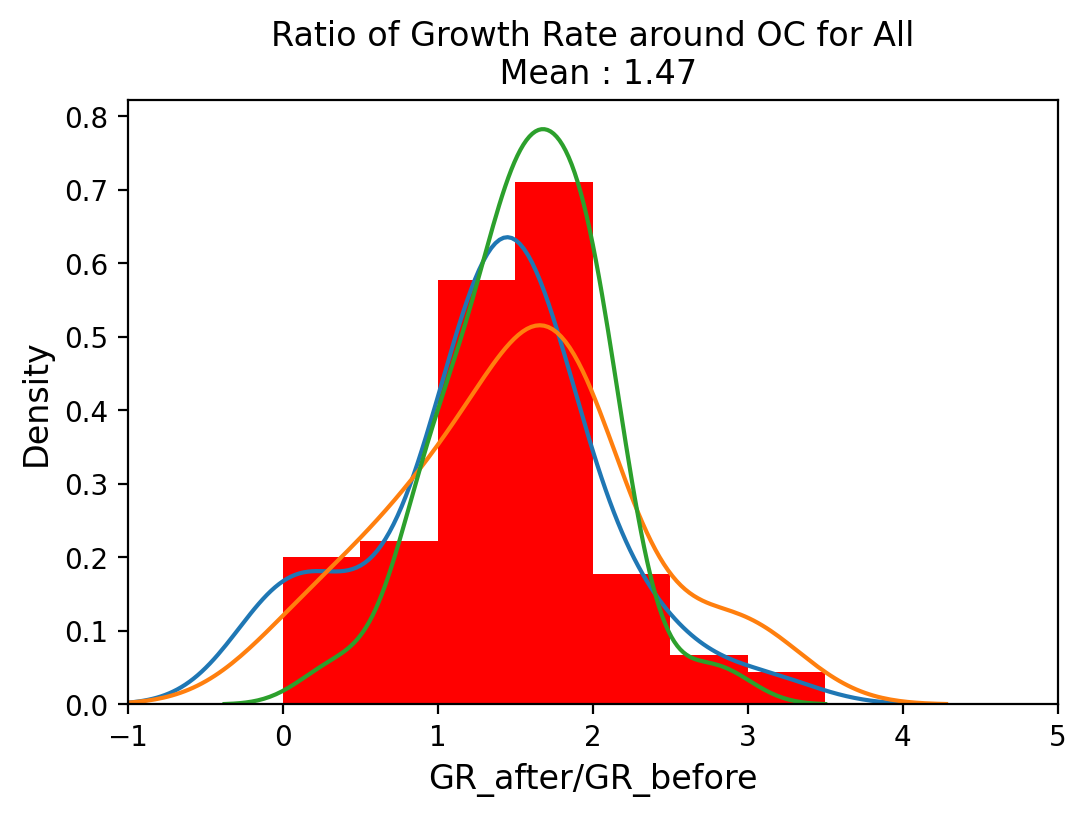

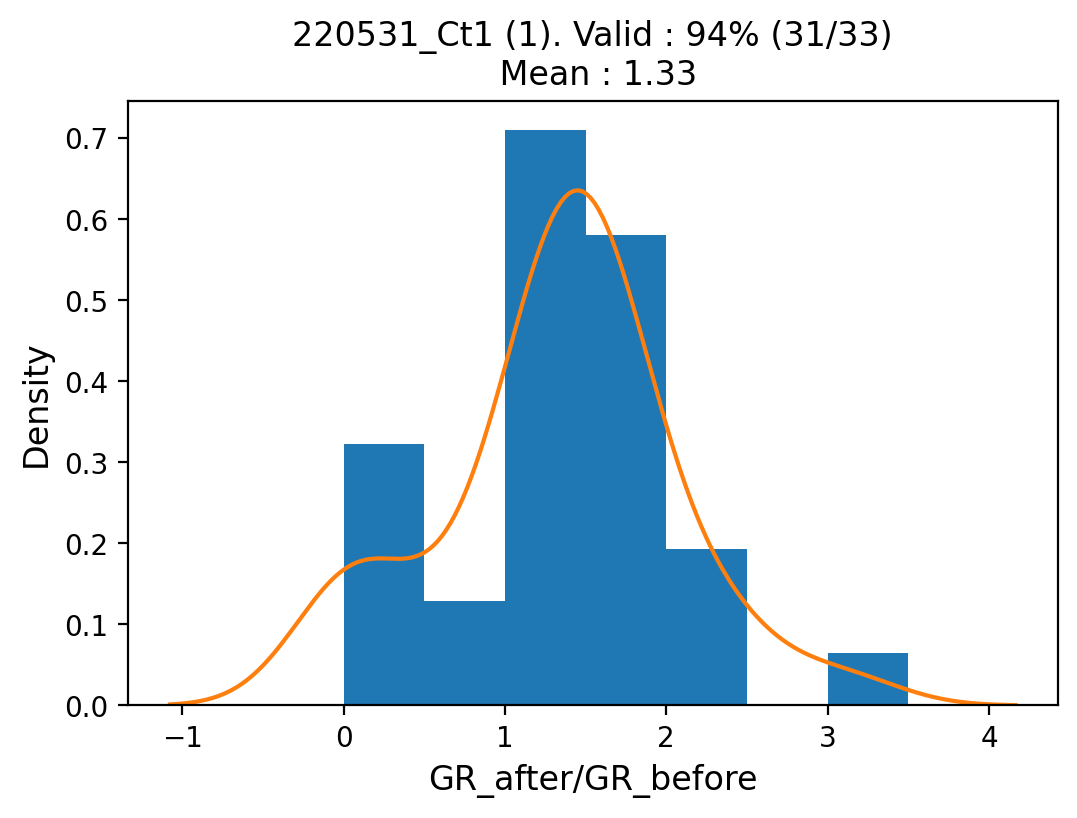

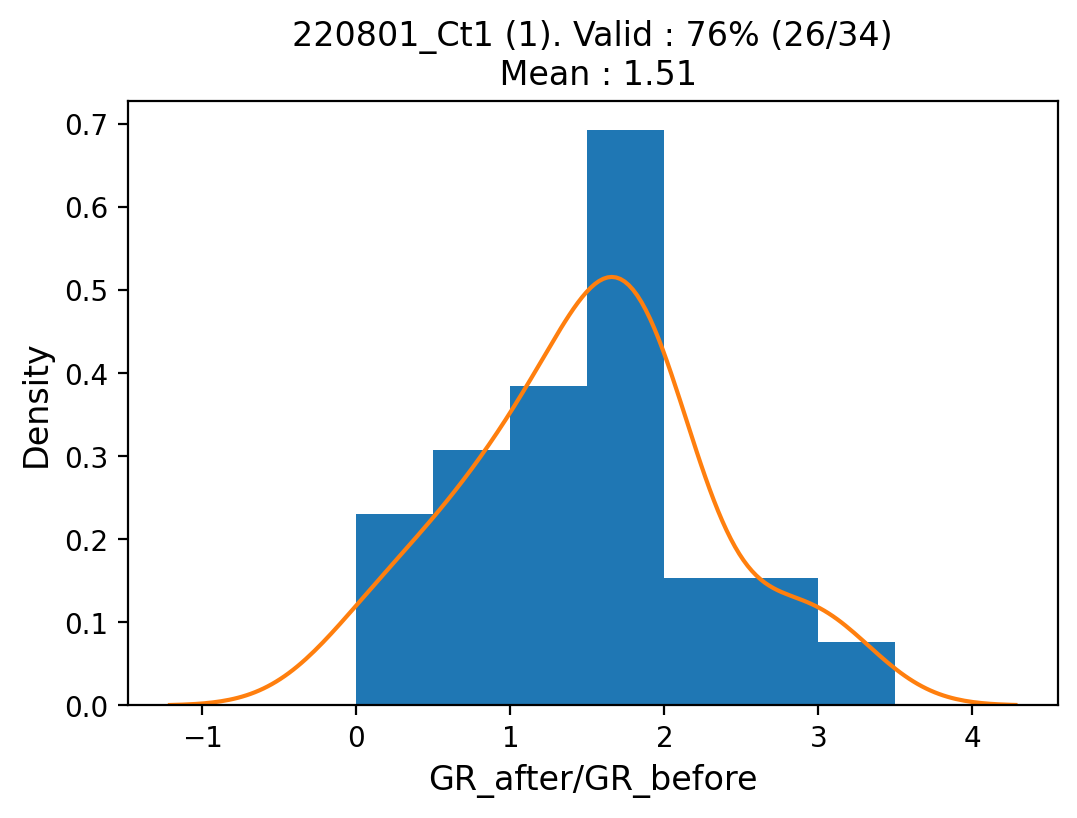

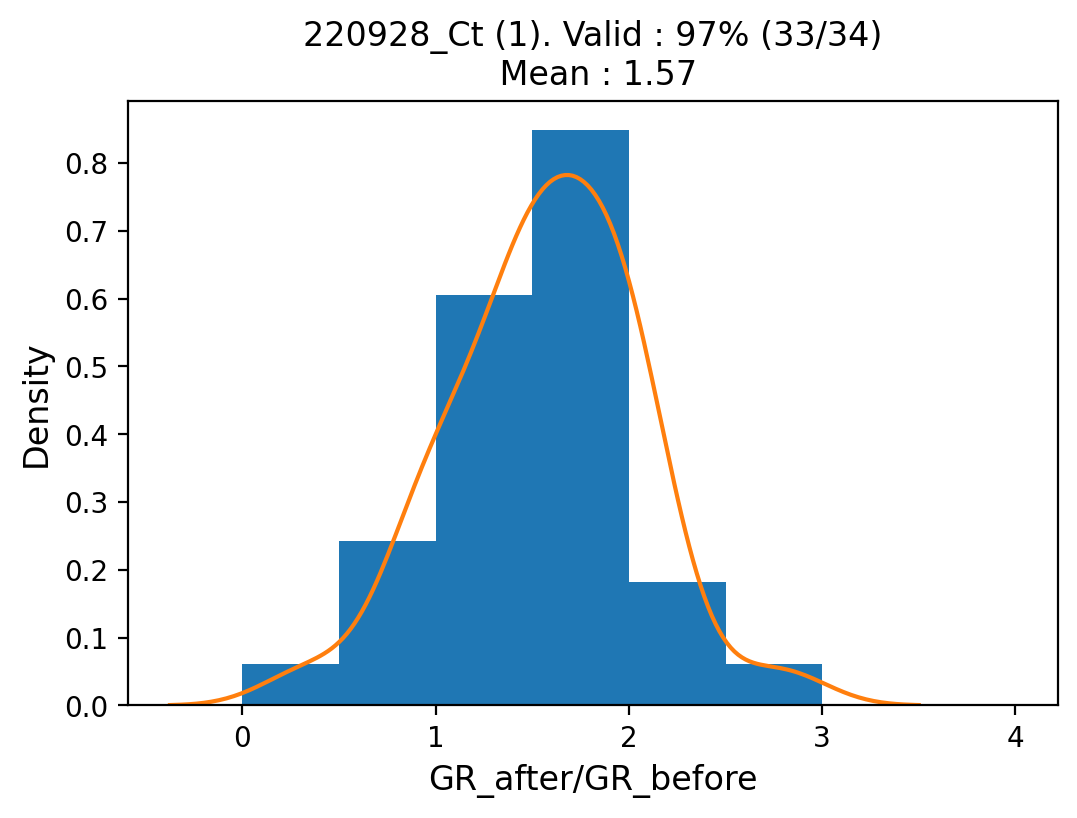

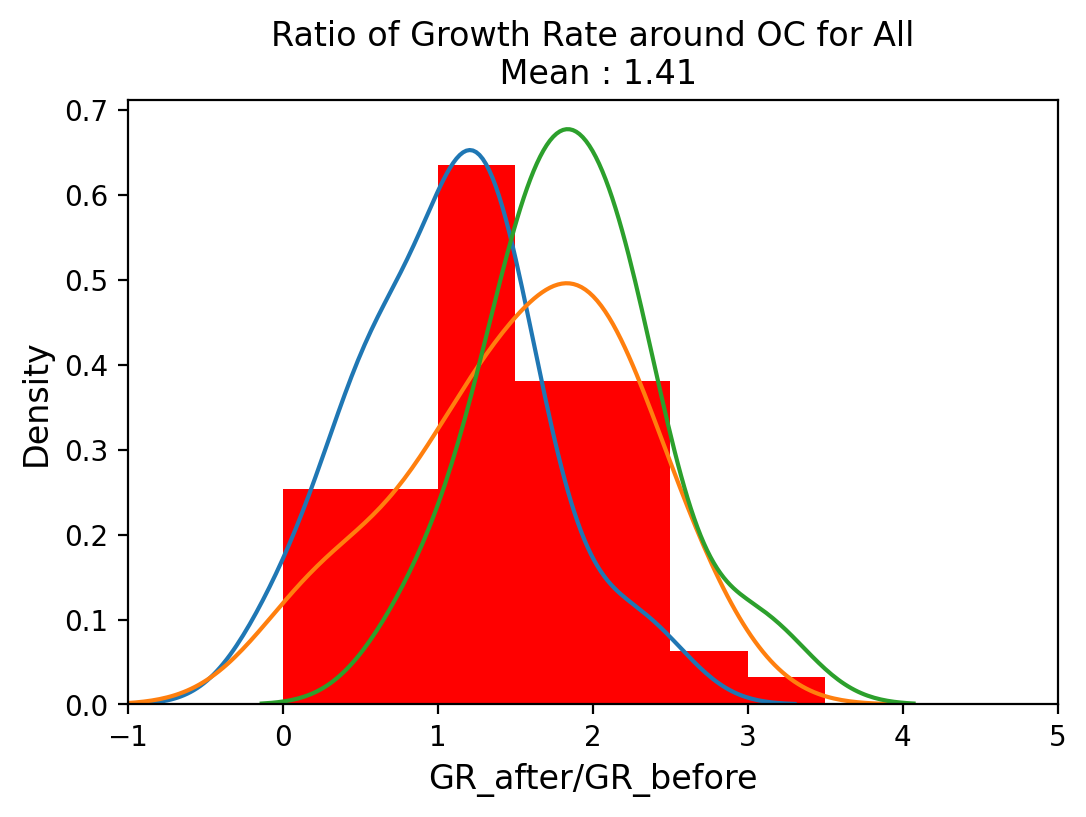

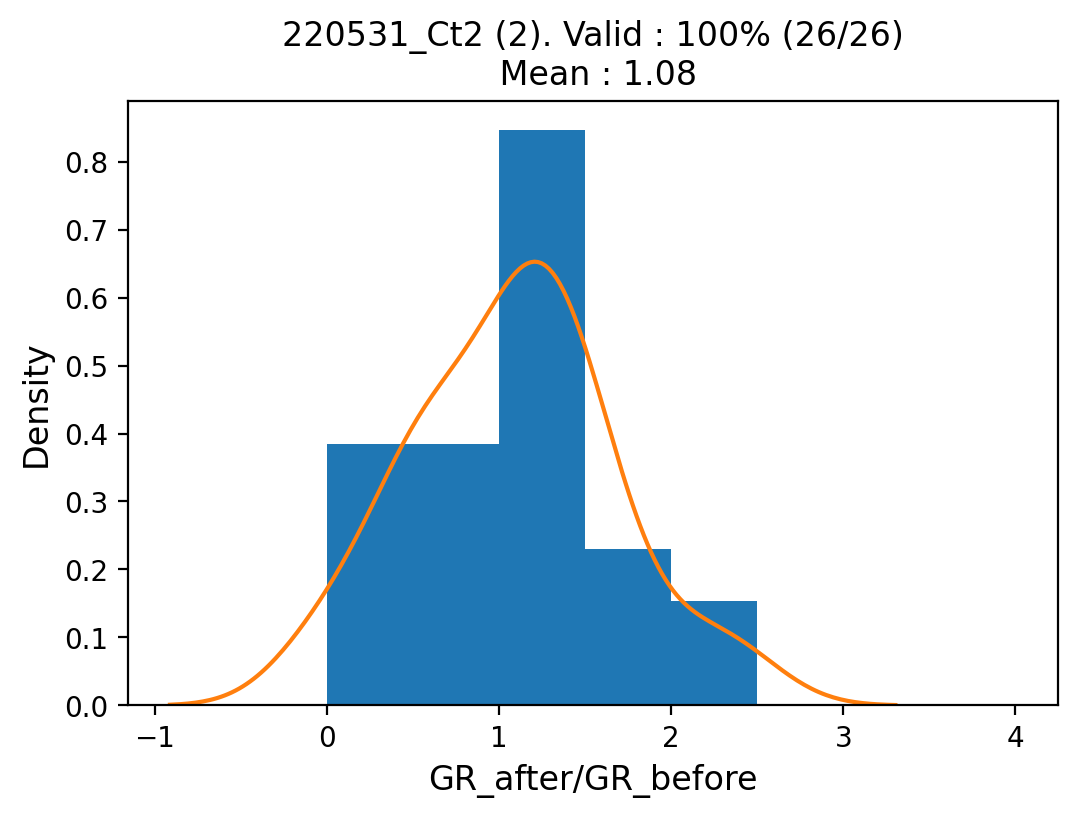

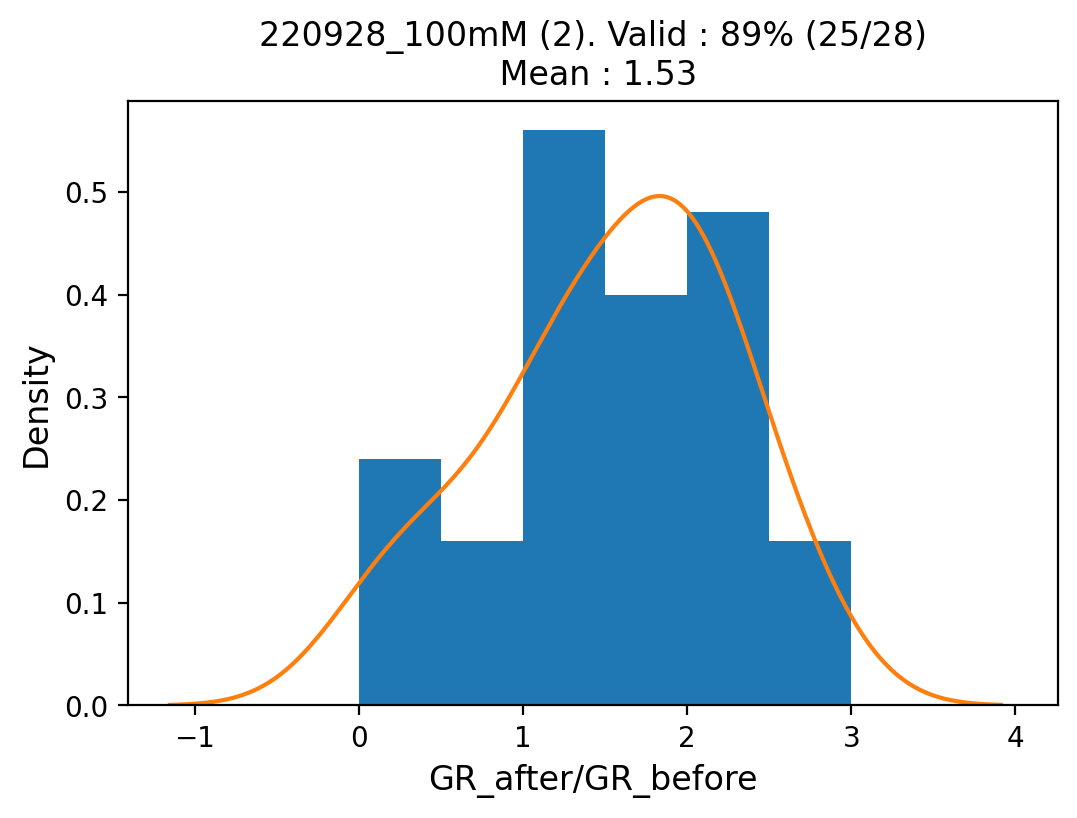

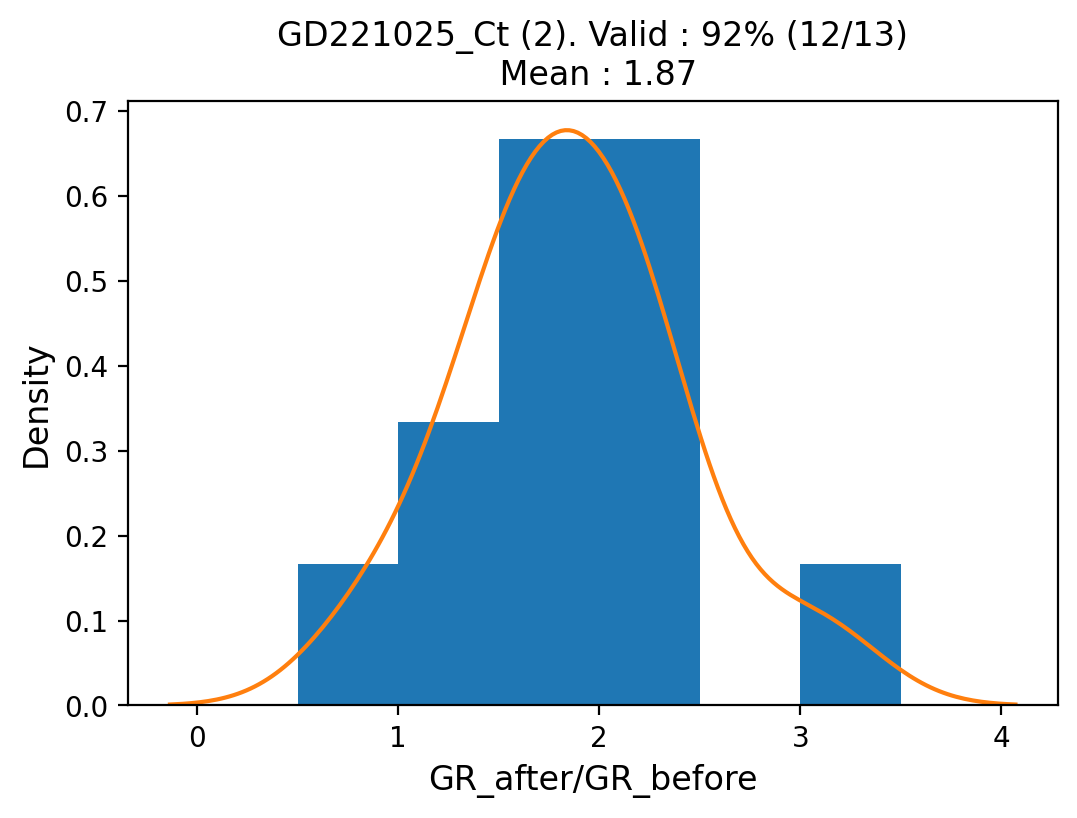

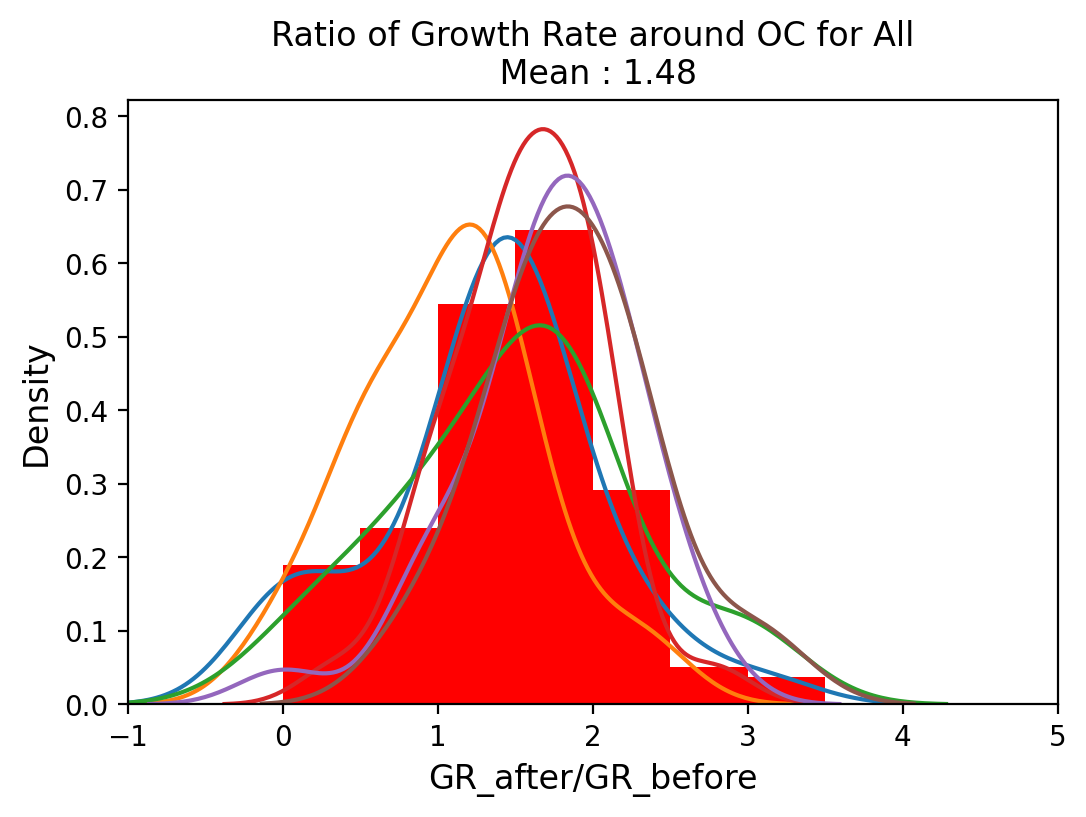

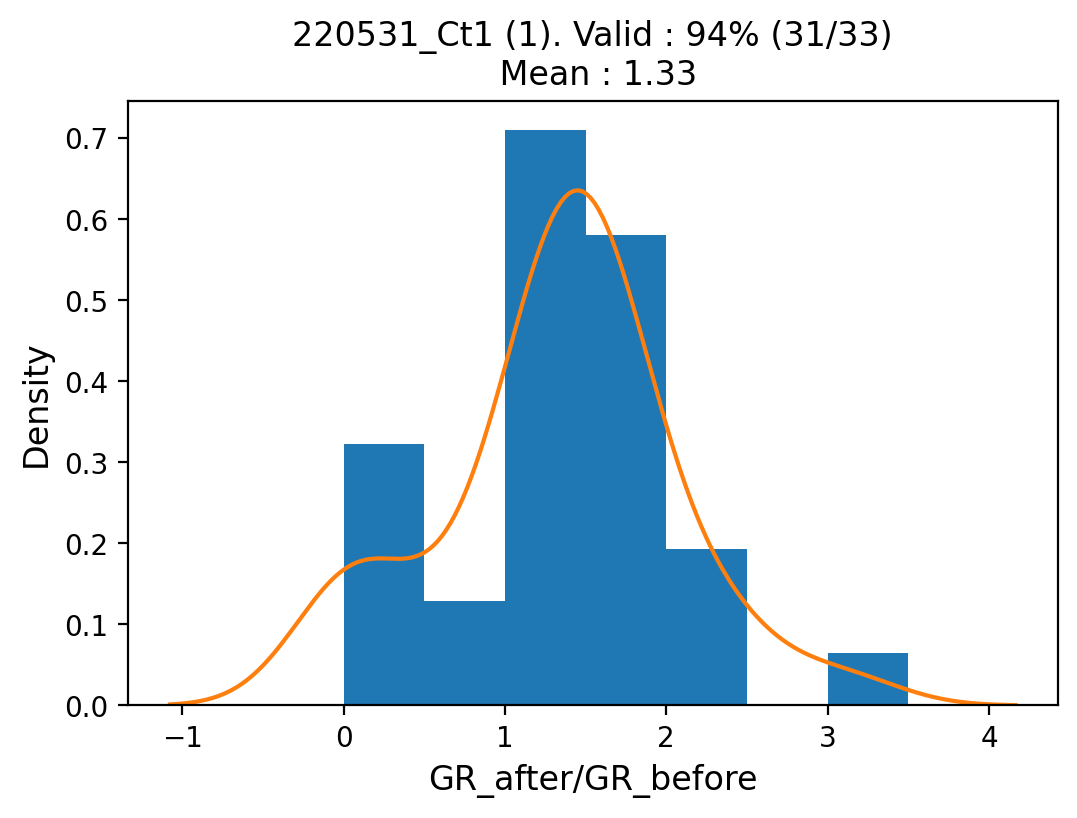

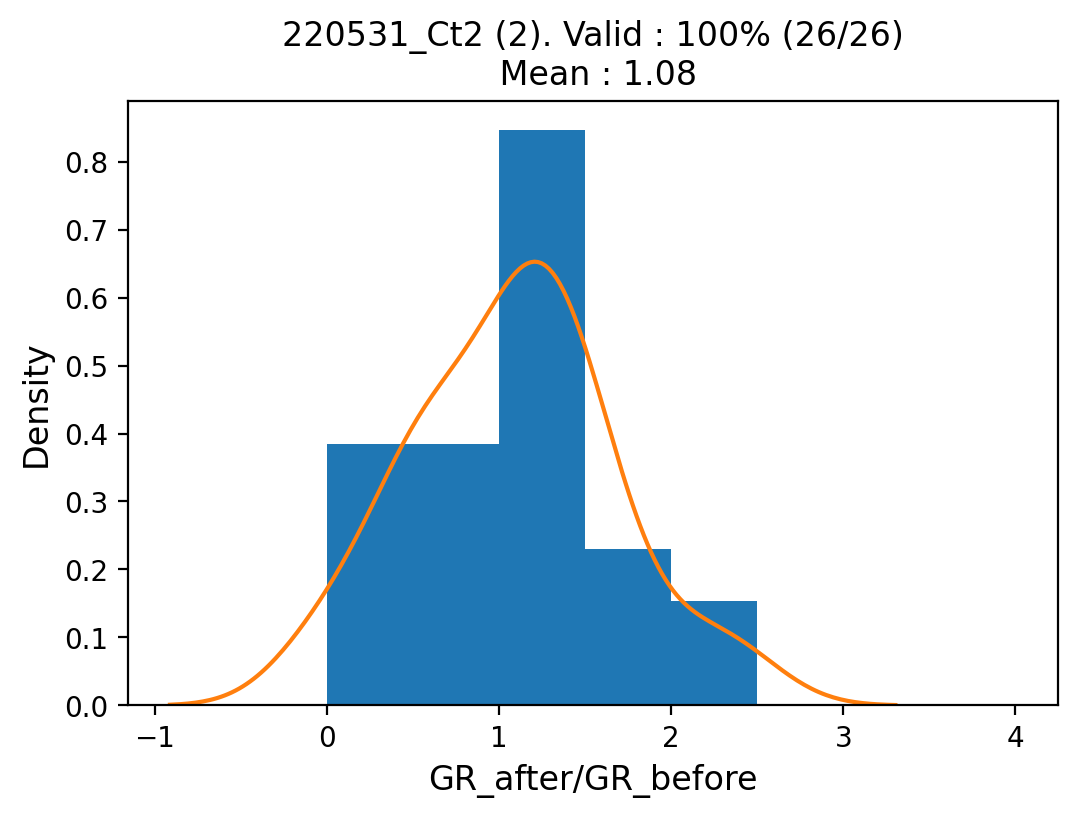

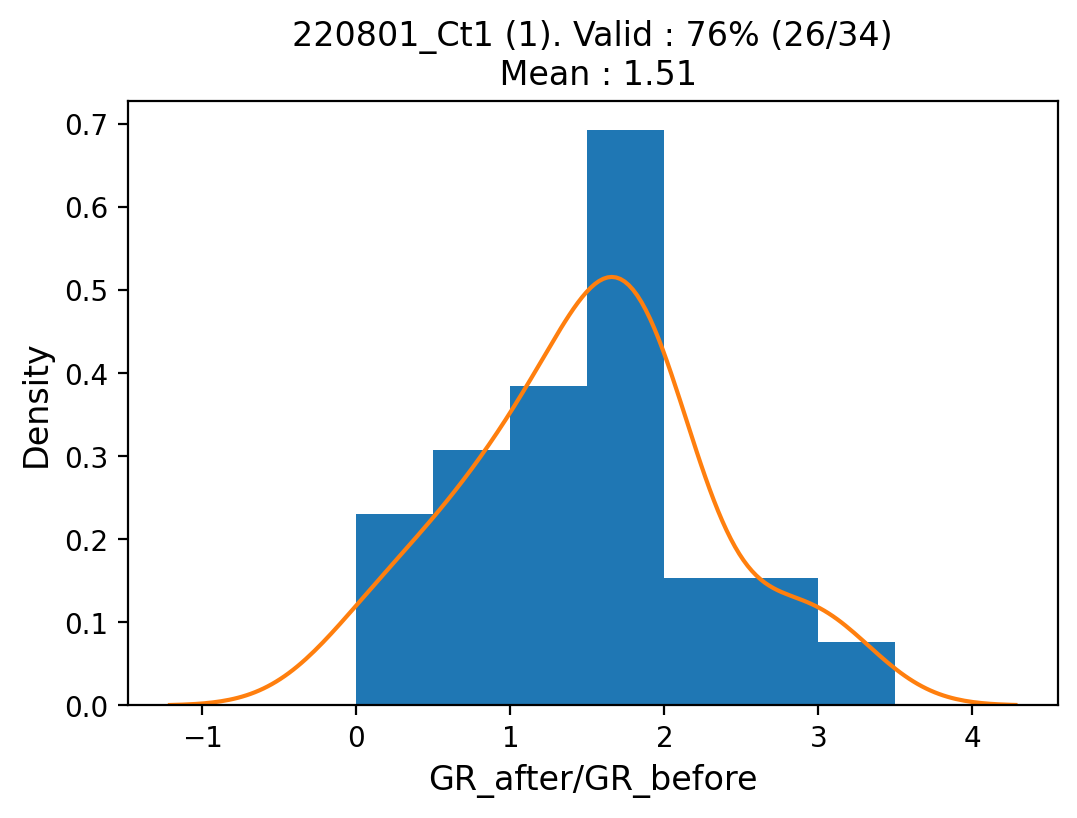

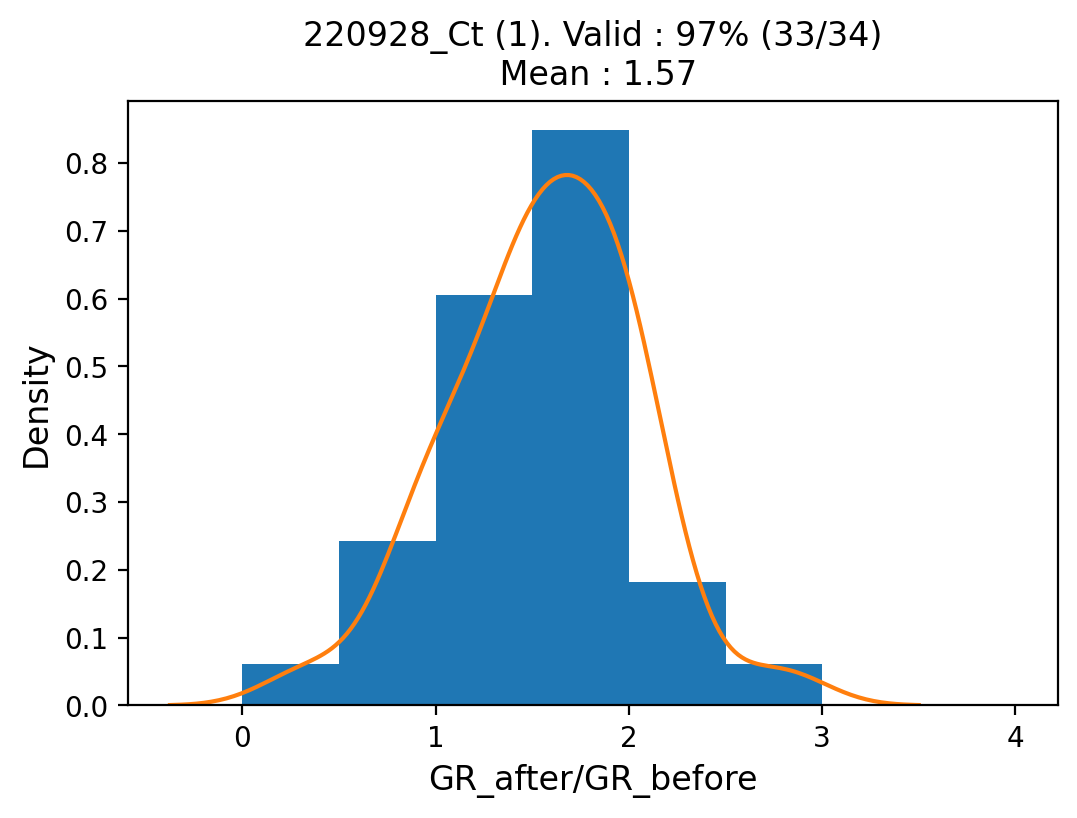

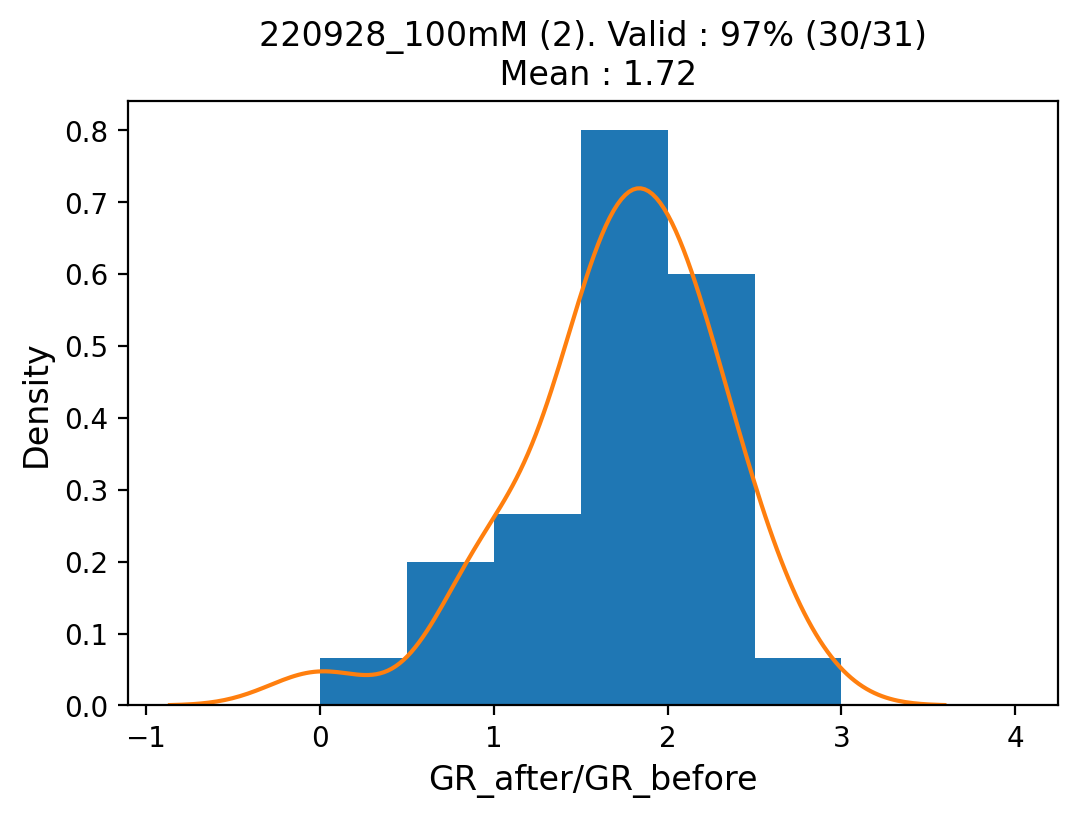

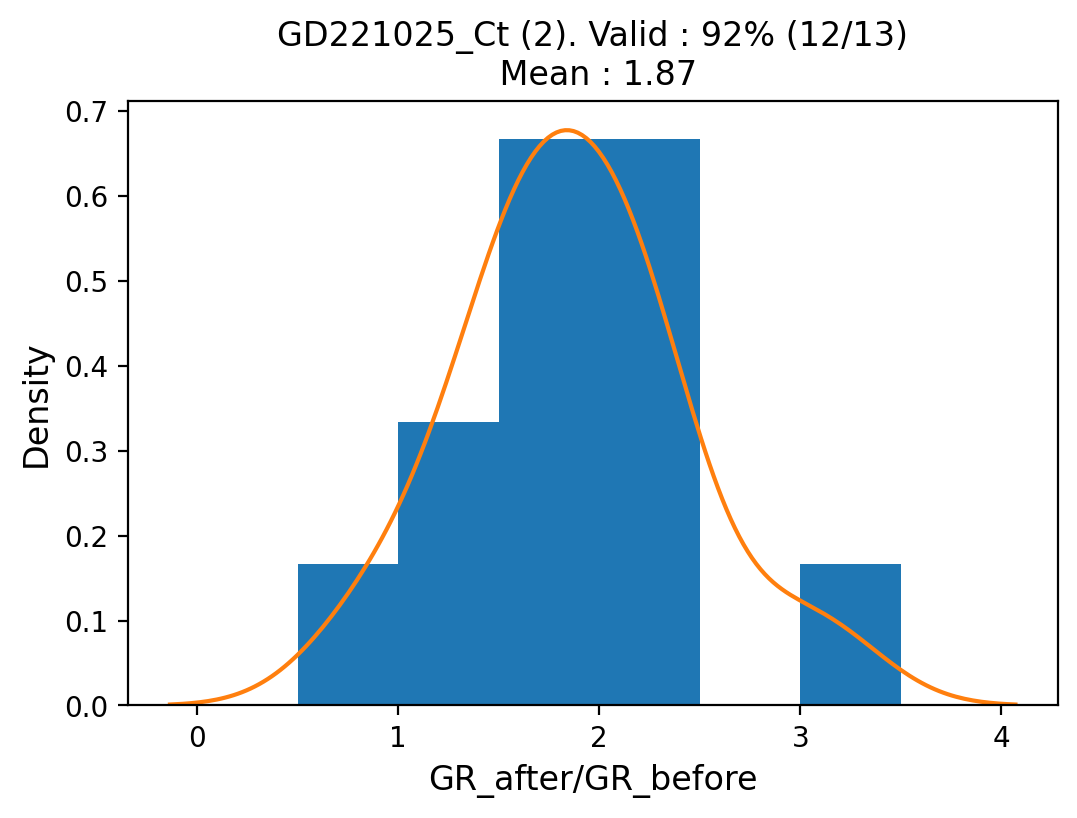

In [33]:

plotGRratio([GD220531_Ct1,GD220801_Ct1,GD220928_Ct],
            [GD220531_Ct1_Osmo,GD220801_Ct1_Osmo,GD220928_Ct_Osmo],
            ['220531_Ct1 (1)','220801_Ct1 (1)','220928_Ct (1)']) 


plotGRratio([GD220531_Ct2,GD220928_100mM,GD221025_Ct],
            [GD220531_Ct2_Osmo,GD220801_Ct1_Osmo,GD221025_Ct_Osmo],
            ['220531_Ct2 (2)','220928_100mM (2)','GD221025_Ct (2)']) 


plotGRratio([GD220531_Ct1,GD220531_Ct2,GD220801_Ct1,GD220928_Ct,GD220928_100mM,GD221025_Ct],
            [GD220531_Ct1_Osmo,GD220531_Ct2_Osmo,GD220801_Ct1_Osmo,GD220928_Ct_Osmo,GD220928_100mM_Osmo,GD221025_Ct_Osmo],
            ['220531_Ct1 (1)','220531_Ct2 (2)','220801_Ct1 (1)','220928_Ct (1)','220928_100mM (2)','GD221025_Ct (2)']) 



